In [1]:
!pip -q install pandas
!pip -q install numpy
!pip -q install matplotlib
!pip -q install textblob
!pip -q install scikit-learn
!pip -q install wordcloud
!pip install -q -U deep-translator
!pip install gliner


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from deep_translator import GoogleTranslator
from gliner import GLiNER

C:\Users\Zhenia\AppData\Local\Temp\ipykernel_9020\2918310949.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\Zhenia\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load data
df_customers = pd.read_csv('Data/S_Data/customers.csv')
df_geo = pd.read_csv('Data/S_Data/geolocation.csv')
df_order_items = pd.read_csv('Data/S_Data/order_items.csv')
df_order_payments = pd.read_csv('Data/S_Data/order_payments.csv')
df_order_reviews = pd.read_csv('Data/S_Data/order_reviews.csv')
df_orders = pd.read_csv('Data/S_Data/orders.csv')
df_products = pd.read_csv('Data/S_Data/products.csv')
df_sellers = pd.read_csv('Data/S_Data/sellers.csv')
df_transl = pd.read_csv('Data/S_Data/product_category_name_translation.csv')

In [4]:
df_order_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [5]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


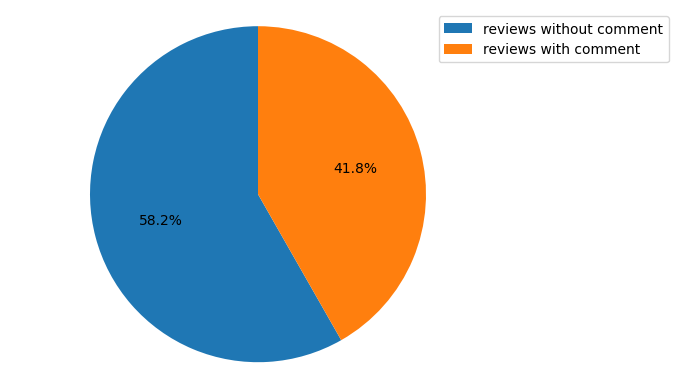

In [6]:
with_msg = df_order_reviews.count()['review_comment_message']
without_msg = df_order_reviews.count()['review_id'] - with_msg

labels = ['reviews without comment', 'reviews with comment']
sizes = [without_msg, with_msg]
pie = plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

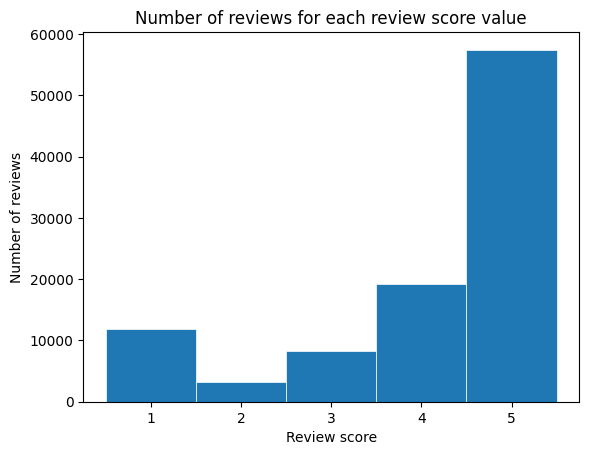

In [7]:
# Plot amount of comments for each score value
fig, ax = plt.subplots()
ax.hist(df_order_reviews['review_score'], bins=[1,2,3,4,5,6], linewidth=0.5, edgecolor="white", align="left")
plt.title("Number of reviews for each review score value")
plt.xlabel("Review score")
plt.ylabel("Number of reviews")
plt.show()

***
*Most reviews are positive.*
***

In [8]:
# Select necessary columns
df_reviews = df_order_reviews[['review_comment_message', 'review_score']]

# Remove rows without comments
idx = ~(df_reviews.isnull().any(axis=1))
df_reviews = df_reviews.loc[idx]

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41753 entries, 3 to 99999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  41753 non-null  object
 1   review_score            41753 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 978.6+ KB


In [9]:
df_reviews.head()

,review_comment_message,review_score
3,Recebi bem antes do prazo estipulado.,5
4,Parabéns lojas lannister adorei comprar pela I...,5
9,aparelho eficiente. no site a marca do aparelh...,4
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4
15,"Vendedor confiável, produto ok e entrega antes...",5


# Task 2.1 (Sentiment Analysis of comments)

In [10]:
# Make comments lowercase for better analysis
df_reviews['review_comment_message'] = df_reviews['review_comment_message'].str.lower()
df_reviews.head()

,review_comment_message,review_score
3,recebi bem antes do prazo estipulado.,5
4,parabéns lojas lannister adorei comprar pela i...,5
9,aparelho eficiente. no site a marca do aparelh...,4
12,"mas um pouco ,travando...pelo valor ta boa.\r\n",4
15,"vendedor confiável, produto ok e entrega antes...",5


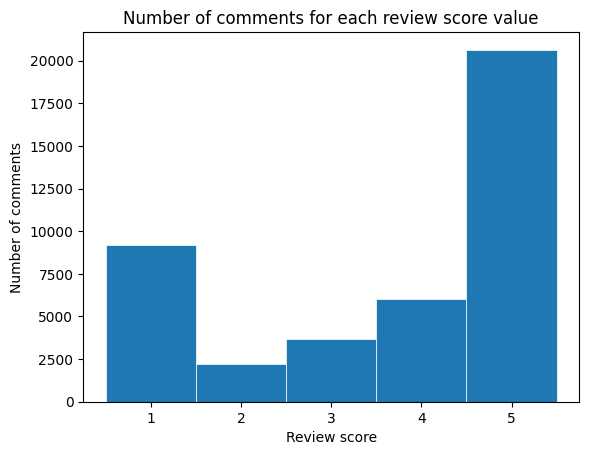

In [11]:
# Plot amount of comments for each score value
fig, ax = plt.subplots()
ax.hist(df_reviews['review_score'], bins=[1,2,3,4,5,6], linewidth=0.5, edgecolor="white", align="left")
plt.title("Number of comments for each review score value")
plt.xlabel("Review score")
plt.ylabel("Number of comments")
plt.show()

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zhenia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

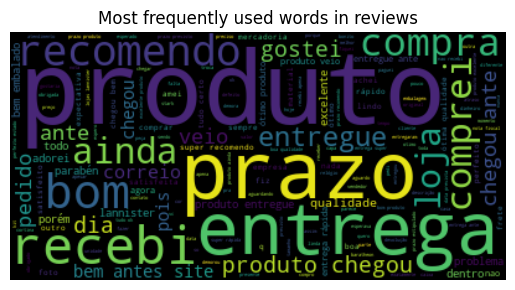

In [13]:
# Create portuguese stopword list
stopwords = nltk.corpus.stopwords.words('portuguese')

# Create wordcloud to see the most frequently used words in the reviews
textt = " ".join(review for review in df_reviews.review_comment_message)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most frequently used words in reviews")
plt.axis("off")
plt.show()

In [14]:
# produto - product
# prazo - deadline
# entrega - delivery
# recomendo - I recommend
# ...

In [15]:
# Classify scores as positive (1), neutral (0), and negative (-1)
df_reviews['sentiment'] = df_reviews['review_score'].apply(lambda rating : 1 if rating > 3 else -1 if rating < 3 else 0)
df_reviews.head()

,review_comment_message,review_score,sentiment
3,recebi bem antes do prazo estipulado.,5,1
4,parabéns lojas lannister adorei comprar pela i...,5,1
9,aparelho eficiente. no site a marca do aparelh...,4,1
12,"mas um pouco ,travando...pelo valor ta boa.\r\n",4,1
15,"vendedor confiável, produto ok e entrega antes...",5,1


In [16]:
# Split df_reviews into positive, neutral, and negative sentiment
positive = df_reviews[df_reviews['sentiment'] == 1]
neutral = df_reviews[df_reviews['sentiment'] == 0]
negative = df_reviews[df_reviews['sentiment'] == -1]

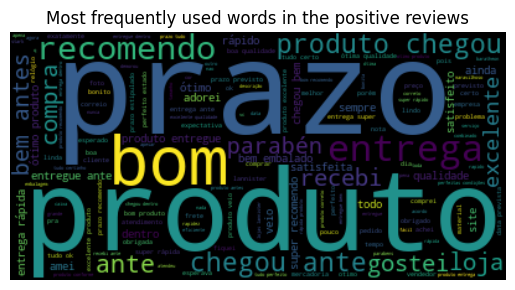

In [17]:
# Create wordcloud to see the most frequently used words in the positive reviews
pos = " ".join(review for review in positive.review_comment_message)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title("Most frequently used words in the positive reviews")
plt.axis("off")
plt.show()

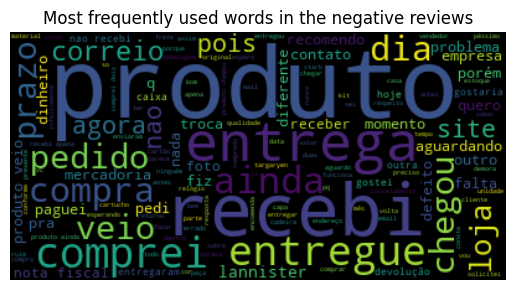

In [18]:
# Create wordcloud to see the most frequently used words in the negative reviews
neg = " ".join(review for review in negative.review_comment_message)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title("Most frequently used words in the negative reviews")
plt.axis("off")
plt.show()

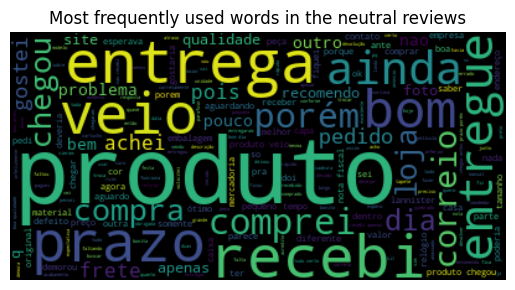

In [19]:
# Create wordcloud to see the most frequently used words in the neutral reviews
neu = " ".join(review for review in neutral.review_comment_message)
wordcloud4 = WordCloud(stopwords=stopwords).generate(neu)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.title("Most frequently used words in the neutral reviews")
plt.axis("off")
plt.show()

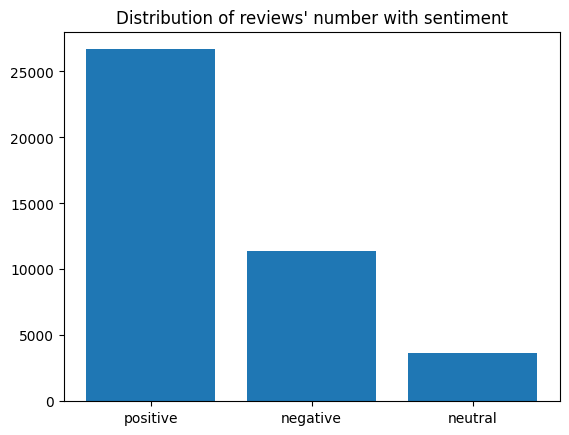

In [20]:
# Plot distribution of reviews with sentiment
fig, ax = plt.subplots()
counts = df_reviews['sentiment'].value_counts()
plt.bar(['positive', 'negative', 'neutral'], [count for count in counts])
plt.title("Distribution of reviews' number with sentiment")
plt.show()

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zhenia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
punkt_symbols = ["?", ".", ";", ":",  "!",'"', ","]

In [23]:
def get_most_common_words(text, number, exceptions):
    all_words = nltk.tokenize.word_tokenize(text, language="portuguese")
    all_words_except_stopwords = nltk.FreqDist(w.lower() for w in all_words if w.lower() not in exceptions)
    return list(dict(all_words_except_stopwords.most_common(number)).keys())

In [24]:
# Find most common words in comments
excpetion_words = stopwords + punkt_symbols
pos_common_words = get_most_common_words(pos, 10, excpetion_words)
neu_common_words = get_most_common_words(neu, 10, excpetion_words)
neg_common_words = get_most_common_words(neg, 10, excpetion_words)

# Find most common words in all sentiment groups of comments
common_words_intersect = list(set(pos_common_words).intersection(set(neg_common_words)).intersection(set(neu_common_words)))
print(common_words_intersect)

['entrega', 'entregue', 'chegou', 'produto']


***
*We will remove common words for all sentiment groups for better classification*
***

In [25]:
# Remove all punctuation from the data
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"', ",", '\r', '\n'))
    return final

remove_common_words = lambda x: ' '.join([item for item in x.split() if item not in common_words_intersect])

df_reviews_wp = df_reviews.copy()

df_reviews_wp['review_comment_message'] = df_reviews_wp['review_comment_message'].apply(remove_punctuation)
df_reviews_wp['review_comment_message'] = df_reviews_wp['review_comment_message'].apply(remove_common_words)
df_reviews_wp.head()

,review_comment_message,review_score,sentiment
3,recebi bem antes do prazo estipulado,5,1
4,parabéns lojas lannister adorei comprar pela i...,5,1
9,aparelho eficiente no site a marca do aparelho...,4,1
12,mas um pouco travandopelo valor ta boa,4,1
15,vendedor confiável ok e antes do prazo,5,1


In [26]:
# Select necessary columns for model training
df_reviews_wp = df_reviews_wp[['review_comment_message','sentiment']]
df_reviews_wp.head(10)

,review_comment_message,sentiment
3,recebi bem antes do prazo estipulado,1
4,parabéns lojas lannister adorei comprar pela i...,1
9,aparelho eficiente no site a marca do aparelho...,1
12,mas um pouco travandopelo valor ta boa,1
15,vendedor confiável ok e antes do prazo,1
16,gostaria de saber o que houve sempre recebi e ...,-1
19,péssimo,-1
22,loja nota 10,1
24,obrigado pela atençao amim dispensada,1
27,a compra foi realizada facilmentea foi efetuad...,1


In [27]:
# Split train and test data
train, test = train_test_split(df_reviews_wp, test_size=0.2)

In [28]:
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33402 entries, 28544 to 90396
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  33402 non-null  object
 1   sentiment               33402 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 782.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 8351 entries, 49297 to 21349
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  8351 non-null   object
 1   sentiment               8351 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 195.7+ KB
None


In [29]:
# Convert the text into a bag-of-words model
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['review_comment_message'])
test_matrix = vectorizer.transform(test['review_comment_message'])

In [30]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [31]:
# Fit model on data
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

C:\Users\Zhenia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
confusion_matrix(predictions,y_test)

array([[1903,  308,  226],
       [ 103,   82,  103],
       [ 288,  331, 5007]], dtype=int64)

In [33]:
# Test the accuracy of our model
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.83      0.78      0.80      2437
           0       0.11      0.28      0.16       288
           1       0.94      0.89      0.91      5626

    accuracy                           0.84      8351
   macro avg       0.63      0.65      0.63      8351
weighted avg       0.88      0.84      0.86      8351



***
Average model precision is ~89%  
It is pretty good considering we didn’t do any feature extraction or much preprocessing
***

In [34]:
def get_comment_sentiment(comment, vectorizer, model):
    vect_comment = vectorizer.transform([comment])
    prediction = model.predict(vect_comment)
    if prediction > 0:
        return 'positive'
    elif prediction < 0:
        return 'negative'
    else:
        return 'neutral'

In [35]:
# Some examples of classification
comments = test['review_comment_message'][:10]

translator = GoogleTranslator(source='auto', target='en')

for comment in comments:
    sentiment = get_comment_sentiment(comment, vectorizer, lr)
    en_comment = translator.translate(comment)
    print(f"Orig. comment: '{comment}'")
    print(f"Eng. comment: '{en_comment}'")
    print(f"Sentiment: [{sentiment}]")
    print("==========================\n")

Orig. comment: 'ainda não deu tempo de tomar para ver o resultado'
Eng. comment: 'I haven't had time to take it yet to see the result.'
Sentiment: [positive]

Orig. comment: 'segunda compra que faço na lannistercom e não recebi nada'
Eng. comment: 'Second purchase I made on Lannistercom and I didn't receive anything'
Sentiment: [negative]

Orig. comment: 'o estava previsto para chegar dia 10/11 até hj ainda n recebi nada estou precisando urgente'
Eng. comment: 'It was scheduled to arrive on 10/11 and until today I still haven't received anything I need it urgently'
Sentiment: [negative]

Orig. comment: 'antes do prazo tudo ok'
Eng. comment: 'before the deadline everything ok'
Sentiment: [positive]

Orig. comment: 'assim que receber o item eu avalio com veracidade e tambem as recomendações'
Eng. comment: 'As soon as I receive the item, I will evaluate it truthfully and also make recommendations.'
Sentiment: [negative]

Orig. comment: 'otima'
Eng. comment: 'kidnaps'
Sentiment: [positive]

***
Possible improvements:

Since the sample is unbalanced, the model is better at recognizing positive reviews. For better performance, the model can be trained on more data, or a third-party Portuguese dataset can be used.
Also, it can be improved feature extraction from the comments to train model on more relevant data.
***

# Task 2.2 (Named Entity recognition - Price extraction)

In [36]:
df_reviews.head(10)

,review_comment_message,review_score,sentiment
3,recebi bem antes do prazo estipulado.,5,1
4,parabéns lojas lannister adorei comprar pela i...,5,1
9,aparelho eficiente. no site a marca do aparelh...,4,1
12,"mas um pouco ,travando...pelo valor ta boa.\r\n",4,1
15,"vendedor confiável, produto ok e entrega antes...",5,1
16,"gostaria de saber o que houve, sempre recebi e...",2,-1
19,péssimo,1,-1
22,loja nota 10,5,1
24,obrigado pela atençao amim dispensada,5,1
27,a compra foi realizada facilmente.\r\na entreg...,5,1


In [37]:
# Find how many comments have decimal values
df_reviews_dec = df_reviews.copy()
df_reviews_dec['decimals'] = df_reviews_dec['review_comment_message'].str.extract('([0-9][,.]*[0-9]*)')
df_reviews_dec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41753 entries, 3 to 99999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  41753 non-null  object
 1   review_score            41753 non-null  int64 
 2   sentiment               41753 non-null  int64 
 3   decimals                4369 non-null   object
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


In [38]:
# Show some examples of comments with price values
no_nans = df_reviews_dec[~df_reviews_dec.isnull().any(axis=1)]
for text in no_nans.review_comment_message[:10]:
    print(text)
    print("====")

aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho
====
loja nota 10
====
recebi somente 1 controle midea split estilo.
faltou controle remoto para ar condicionado consul
====
este foi o pedido
balde com 128 peças - blocos de montar 2 un - r$ 25,00 cada (não foi entregue)
vendido e entregue targaryen
tapete de eva nº letras 36 peças crianças 1 un - r$ 35,90 (este foi entreg
====
comprei o produto dia 25 de fevereiro e hoje dia 29 de marco não fora entregue na minha residência. não sei se os correios desse brasil e péssimo ou foi a própria loja que demorou postar.
====
fiz minha compra faz 30 dias e não recebi ainda meu produto.
precisa melhorar nas entregas
====
faltou 1 produto e os que recebi 1 veio quebrado
====
fiz um pedido de 4 garrafas de azeite.chegaram 2 num dia e as outras 2 quase 48 horas depois.contato com a loja muito dificil,tanto via e-mail qto por 

***
For price entity extraction we will use GLiNER model for price entity extraction.

GLiNER is a Named Entity Recognition (NER) model capable of identifying any entity type using a bidirectional transformer encoder (BERT-like). It provides a practical alternative to traditional NER models, which are limited to predefined entities, and Large Language Models (LLMs) that, despite their flexibility, are costly and large for resource-constrained scenarios. This model has the commercially permissive Apache 2.0 license.  

Unlike another NER model, we don’t have to train or fine-tune anything. We just need to specify a list which entities we want to extract from our text.
***

***
The SpaCy and nltk library tools have also been used, but they have not been as successful as GLiNER.
***

In [39]:
# Initialize model
model = GLiNER.from_pretrained("urchade/gliner_base")

Fetching 4 files: 100%|███████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]
C:\Users\Zhenia\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\convert_slow_tokenizer.py:562: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [40]:
def get_feature_from_text(text, features, model):
    return model.predict_entities(text, features, threshold=0.5)

text = """
No anúncio dizia "Marca--- Canon" e eu recebi um produto "Similar" "compatível".
Se eu quisesse um produto falsificado/pirata compraria na minha cidade por 10 reais, não precisaria recorrer à internet
"""

entities = get_feature_from_text(text, ["price"], model)
for entity in entities:
    print(entity["text"], "=>", entity["label"])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


10 reais => price


In [41]:
translator = GoogleTranslator(source='auto', target='en')

for comment in no_nans.review_comment_message[:21:3]:
    en_comment = translator.translate(comment)
    print(f"[ Orig. comment ]: {comment}")
    print(f"[ En. comment ]: {en_comment}")
    
    entities = get_feature_from_text(comment, ["price"], model)
    print(f"[ Price extractions ]:")
    for entity in entities:
        print(entity["text"], "=>", entity["label"])
    
    print("====")

[ Orig. comment ]: aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho
[ En. comment ]: efficient device. On the website the brand of the device is printed as 3desinfector and when it arrives it has a different name...update with the correct brand as it is the same device
[ Price extractions ]:
====
[ Orig. comment ]: este foi o pedido
balde com 128 peças - blocos de montar 2 un - r$ 25,00 cada (não foi entregue)
vendido e entregue targaryen
tapete de eva nº letras 36 peças crianças 1 un - r$ 35,90 (este foi entreg
[ En. comment ]: this was the request
bucket with 128 pieces - 2 building blocks - R$ 25.00 each (not delivered)
sold and delivered targaryen
eva mat number letters 36 pieces children 1 unit - R$ 35.90 (this was delivered
[ Price extractions ]:
2 un - r$ 25,00 => price
35,90 => price
====
[ Orig. comment ]: faltou 1 produto e os que recebi 1 veio quebrad

***
Possible improvements:

It also can be used approach with regular expressions. For example, extracting decimal values from the comment and analyzing the nearest words. If they are similar to money expressions, we can classify it as a price.
***